### Pipeline gerarchica - Multicollasso

In [1]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict

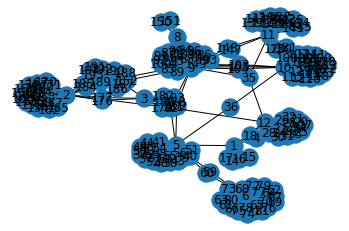

In [20]:
filename = 'bn-mouse_visual-cortex_2.edges'
G = nx.read_edgelist(filename)

nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Sottografo `motif`

In [21]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

#### Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [22]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

#### Identify `motif` in `G`

In [23]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

#### Restituisce il mapping per la compressione

In [24]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

####  Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [25]:
G = rinomina(G)

In [26]:
G.nodes()

NodeView(((0, '1'), (0, '4'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '2'), (0, '7'), (0, '82'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '170'), (0, '171'), (0, '172'), (0, '173'), (0, '174'), (0, '175'), (0, '176'), (0, '177'), (0, '184'), (0, '185'), (0, '3'), (0, '102'), (0, '178'), (0, '179'), (0, '180'), (0, '181'), (0, '182'), (0, '183'), (0, '5'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '60'), (0, '6'), (0, '61'), (0, '62'), (0, '63'), (0, '64'), (0, '65'), (0, '66'), (0, '67'), (0, '68'), (0, '69'), (0, '70'), (0, '71'), (0, '72'), (0, '73'), (0, '74'), (0, '

In [37]:
nodi = list(G.nodes())
nodi

[(0, '1'),
 (0, '4'),
 (0, '14'),
 (0, '15'),
 (0, '16'),
 (0, '17'),
 (0, '18'),
 (0, '2'),
 (0, '7'),
 (0, '82'),
 (0, '152'),
 (0, '153'),
 (0, '154'),
 (0, '155'),
 (0, '156'),
 (0, '157'),
 (0, '158'),
 (0, '159'),
 (0, '160'),
 (0, '161'),
 (0, '162'),
 (0, '163'),
 (0, '164'),
 (0, '165'),
 (0, '166'),
 (0, '167'),
 (0, '168'),
 (0, '169'),
 (0, '170'),
 (0, '171'),
 (0, '172'),
 (0, '173'),
 (0, '174'),
 (0, '175'),
 (0, '176'),
 (0, '177'),
 (0, '184'),
 (0, '185'),
 (0, '3'),
 (0, '102'),
 (0, '178'),
 (0, '179'),
 (0, '180'),
 (0, '181'),
 (0, '182'),
 (0, '183'),
 (0, '5'),
 (0, '36'),
 (0, '37'),
 (0, '38'),
 (0, '39'),
 (0, '40'),
 (0, '41'),
 (0, '42'),
 (0, '43'),
 (0, '44'),
 (0, '45'),
 (0, '46'),
 (0, '47'),
 (0, '48'),
 (0, '49'),
 (0, '50'),
 (0, '51'),
 (0, '52'),
 (0, '53'),
 (0, '54'),
 (0, '55'),
 (0, '56'),
 (0, '57'),
 (0, '58'),
 (0, '59'),
 (0, '60'),
 (0, '6'),
 (0, '61'),
 (0, '62'),
 (0, '63'),
 (0, '64'),
 (0, '65'),
 (0, '66'),
 (0, '67'),
 (0, '68'),


In [40]:
lista1 = find_motifs(motif, G)
len(lista1)


24

In [41]:
lista1

[{1: (0, '1'), 3: (0, '4'), 2: (0, '12')},
 {1: (0, '1'), 3: (0, '18'), 2: (0, '12')},
 {1: (0, '1'), 3: (0, '12'), 2: (0, '4')},
 {1: (0, '1'), 3: (0, '12'), 2: (0, '18')},
 {1: (0, '4'), 3: (0, '1'), 2: (0, '12')},
 {1: (0, '4'), 3: (0, '12'), 2: (0, '1')},
 {1: (0, '18'), 3: (0, '1'), 2: (0, '12')},
 {1: (0, '18'), 3: (0, '12'), 2: (0, '1')},
 {1: (0, '2'), 3: (0, '7'), 2: (0, '184')},
 {1: (0, '2'), 3: (0, '7'), 2: (0, '185')},
 {1: (0, '2'), 3: (0, '184'), 2: (0, '7')},
 {1: (0, '2'), 3: (0, '185'), 2: (0, '7')},
 {1: (0, '7'), 3: (0, '2'), 2: (0, '184')},
 {1: (0, '7'), 3: (0, '2'), 2: (0, '185')},
 {1: (0, '7'), 3: (0, '184'), 2: (0, '2')},
 {1: (0, '7'), 3: (0, '185'), 2: (0, '2')},
 {1: (0, '184'), 3: (0, '2'), 2: (0, '7')},
 {1: (0, '184'), 3: (0, '7'), 2: (0, '2')},
 {1: (0, '185'), 3: (0, '2'), 2: (0, '7')},
 {1: (0, '185'), 3: (0, '7'), 2: (0, '2')},
 {1: (0, '12'), 3: (0, '1'), 2: (0, '4')},
 {1: (0, '12'), 3: (0, '1'), 2: (0, '18')},
 {1: (0, '12'), 3: (0, '4'), 2: (0, '

In [38]:
ris = identify(motif, G)
ris

[[(0, '1'), (0, '12'), (0, '18')],
 [(0, '1'), (0, '12'), (0, '4')],
 [(0, '184'), (0, '2'), (0, '7')],
 [(0, '185'), (0, '2'), (0, '7')]]

In [27]:
def multicoll(G):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    # chiama identify
    ris = identify(motif, G)
    while ris != []:
        ris = identify(motif, G)
        mapping = zippa(ris, nodi)
        G = nx.relabel_nodes(G, mapping)
        # togli triangolo usato
        # la lista ris diminuisce
        ris = ris[1:]
        # i nodi cambiano, sono il risultato della compressione
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))

    return res

In [28]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [193, 189, 185] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '17'), (0, '170'), (0, '

[((0, '1'), (0, '4')), ((0, '1'), (0, '14')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '18')), ((0, '1'), (0, '5')), ((0, '1'), (0, '12')), ((0, '4'), (0, '12')), ((0, '18'), (0, '12')), ((0, '2'), (0, '7')), ((0, '2'), (0, '82')), ((0, '2'), (0, '152')), ((0, '2'), (0, '153')), ((0, '2'), (0, '154')), ((0, '2'), (0, '155')), ((0, '2'), (0, '156')), ((0, '2'), (0, '157')), ((0, '2'), (0, '158')), ((0, '2'), (0, '159')), ((0, '2'), (0, '160')), ((0, '2'), (0, '161')), ((0, '2'), (0, '162')), ((0, '2'), (0, '163')), ((0, '2'), (0, '164')), ((0, '2'), (0, '165')), ((0, '2'), (0, '166')), ((0, '2'), (0, '167')), ((0, '2'), (0, '168')), ((0, '2'), (0, '169')), ((0, '2'), (0, '170')), ((0, '2'), (0, '171')), ((0, '2'), (0, '172')), ((0, '2'), (0, '173')), ((0, '2'), (0, '174')), ((0, '2'), (0, '175')), ((0, '2'), (0, '176')), ((0, '2'), (0, '177')), ((0, '2'), (0, '184')), ((0, '2'), (0, '185')), ((0, '7'), (0, '3')), ((0, '7'), (0, '149')), ((0, '7

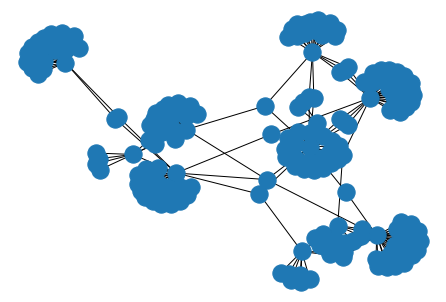

[((1, '1'), (0, '4')), ((1, '1'), (0, '14')), ((1, '1'), (0, '15')), ((1, '1'), (0, '16')), ((1, '1'), (0, '17')), ((1, '1'), (1, '1')), ((1, '1'), (0, '5')), ((1, '1'), (0, '82')), ((1, '1'), (0, '35')), ((1, '1'), (0, '19')), ((1, '1'), (0, '20')), ((1, '1'), (0, '21')), ((1, '1'), (0, '22')), ((1, '1'), (0, '23')), ((1, '1'), (0, '24')), ((1, '1'), (0, '25')), ((1, '1'), (0, '26')), ((1, '1'), (0, '27')), ((1, '1'), (0, '28')), ((1, '1'), (0, '29')), ((1, '1'), (0, '30')), ((1, '1'), (0, '31')), ((1, '1'), (0, '32')), ((1, '1'), (0, '33')), ((1, '1'), (0, '34')), ((1, '184'), (1, '184')), ((1, '184'), (0, '82')), ((1, '184'), (0, '152')), ((1, '184'), (0, '153')), ((1, '184'), (0, '154')), ((1, '184'), (0, '155')), ((1, '184'), (0, '156')), ((1, '184'), (0, '157')), ((1, '184'), (0, '158')), ((1, '184'), (0, '159')), ((1, '184'), (0, '160')), ((1, '184'), (0, '161')), ((1, '184'), (0, '162')), ((1, '184'), (0, '163')), ((1, '184'), (0, '164')), ((1, '184'), (0, '165')), ((1, '184'),

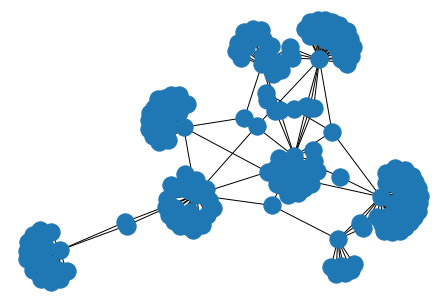

[((2, '1'), (0, '4')), ((2, '1'), (0, '14')), ((2, '1'), (0, '15')), ((2, '1'), (0, '16')), ((2, '1'), (0, '17')), ((2, '1'), (2, '1')), ((2, '1'), (0, '35')), ((2, '1'), (0, '19')), ((2, '1'), (0, '20')), ((2, '1'), (0, '21')), ((2, '1'), (0, '22')), ((2, '1'), (0, '23')), ((2, '1'), (0, '24')), ((2, '1'), (0, '25')), ((2, '1'), (0, '26')), ((2, '1'), (0, '27')), ((2, '1'), (0, '28')), ((2, '1'), (0, '29')), ((2, '1'), (0, '30')), ((2, '1'), (0, '31')), ((2, '1'), (0, '32')), ((2, '1'), (0, '33')), ((2, '1'), (0, '34')), ((2, '1'), (2, '176')), ((2, '1'), (0, '9')), ((2, '1'), (0, '102')), ((2, '1'), (0, '36')), ((2, '1'), (0, '37')), ((2, '1'), (0, '38')), ((2, '1'), (0, '39')), ((2, '1'), (0, '40')), ((2, '1'), (0, '41')), ((2, '1'), (0, '42')), ((2, '1'), (0, '43')), ((2, '1'), (0, '44')), ((2, '1'), (0, '45')), ((2, '1'), (0, '46')), ((2, '1'), (0, '47')), ((2, '1'), (0, '48')), ((2, '1'), (0, '49')), ((2, '1'), (0, '50')), ((2, '1'), (0, '51')), ((2, '1'), (0, '52')), ((2, '1'), 

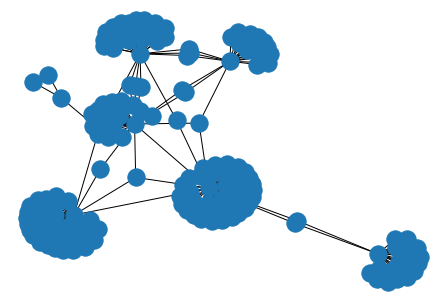

In [30]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---

#### MEMORIZZA merge, per poter ricostruire inversamente
Ora funziona con il primo mapping, da rendere iterabile

In [31]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [32]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, '1'): (1, '1'),
 (0, '10'): (0, '10'),
 (0, '100'): (0, '100'),
 (0, '101'): (0, '101'),
 (0, '102'): (0, '102'),
 (0, '103'): (0, '103'),
 (0, '104'): (0, '104'),
 (0, '105'): (0, '105'),
 (0, '106'): (0, '106'),
 (0, '107'): (0, '107'),
 (0, '108'): (0, '108'),
 (0, '109'): (0, '109'),
 (0, '11'): (0, '11'),
 (0, '110'): (0, '110'),
 (0, '111'): (0, '111'),
 (0, '112'): (0, '112'),
 (0, '113'): (0, '113'),
 (0, '114'): (0, '114'),
 (0, '115'): (0, '115'),
 (0, '116'): (0, '116'),
 (0, '117'): (0, '117'),
 (0, '118'): (0, '118'),
 (0, '119'): (0, '119'),
 (0, '12'): (1, '1'),
 (0, '120'): (0, '120'),
 (0, '121'): (0, '121'),
 (0, '122'): (0, '122'),
 (0, '123'): (0, '123'),
 (0, '124'): (0, '124'),
 (0, '125'): (0, '125'),
 (0, '126'): (0, '126'),
 (0, '127'): (0, '127'),
 (0, '128'): (0, '128'),
 (0, '129'): (0, '129'),
 (0, '130'): (0, '130'),
 (0, '131'): (0, '131'),
 (0, '132'): (0, '132'),
 (0, '133'): (0, '133'),
 (0, '134'): (0, '134'),
 (0, '135'): (0, '135'),
 (0, '136')

In [33]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, '1'): [(0, '1'), (0, '12'), (0, '18')]}

***

### Indici

**Nodi compressi e nodi mantenuti, count e %**

In [34]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(8, 4.145077720207254, 185, 95.85492227979275)

#### Statistiche per livello

In [35]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  193 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '17'), (0, '170'), (0, '171'), (0, '172'), (0

---

#### Testare la funzione anche con altri motif

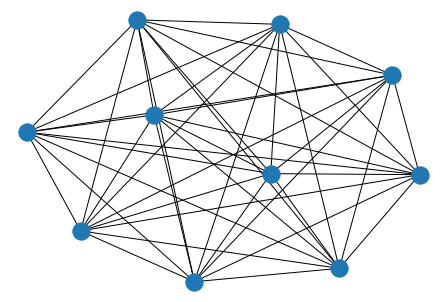

In [17]:
G0 = nx.complete_graph(10, create_using=None)
G = rinomina(G0)
nx.draw(G)

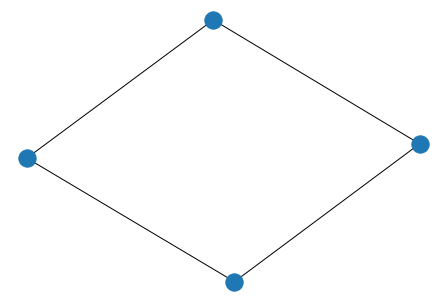

In [18]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.draw(motif)

In [19]:
ris = identify(motif, G)
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])

In [20]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [10, 4, 1] 
Nodi:  [[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)], [(1, 0), (1, 4), (0, 8), (0, 9)], [(2, 0)]] 
Archi:  [[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))], [(

[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))]


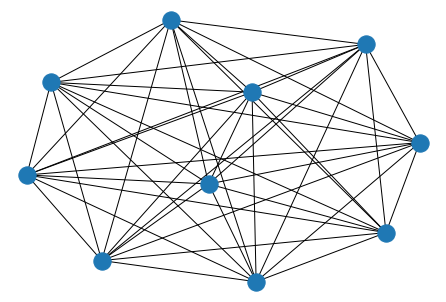

[((1, 0), (1, 0)), ((1, 0), (1, 4)), ((1, 0), (0, 8)), ((1, 0), (0, 9)), ((1, 4), (1, 4)), ((1, 4), (0, 8)), ((1, 4), (0, 9)), ((0, 8), (0, 9))]


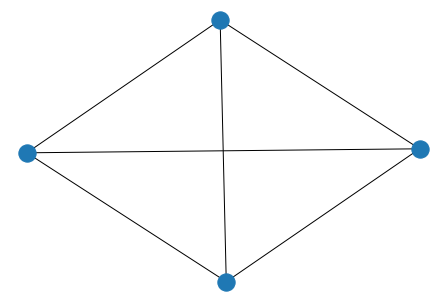

[((2, 0), (2, 0))]


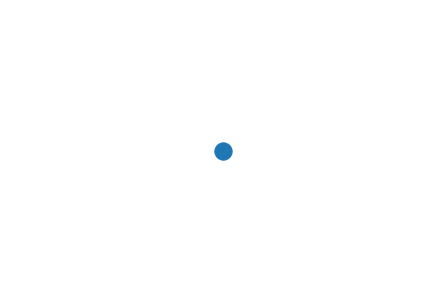

In [21]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---